In [9]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline
#plt.rcParams["figure.figsize"] = [8, 8]

import warnings
warnings.filterwarnings("ignore")


In [10]:
from sklearn.model_selection import train_test_split

# 1. Импорт датасета


In [14]:
data = pd.read_csv('data.csv', index_col=0)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [16]:
np.round(data.isna().sum()[data.isna().sum()>0] / data.shape[0], 2)

Unnamed: 32    1.0
dtype: float64

In [17]:
features_with_na=data.isna().sum()[data.isna().sum()>0] / data.shape[0]
list_to_drop=features_with_na[features_with_na>0.3].index.tolist()
list_to_drop

['Unnamed: 32']

In [18]:
data.drop(list_to_drop, axis=1, inplace=True)

In [19]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
data.dropna().shape[0] / data.shape[0]

1.0

In [21]:
#пустых строк нет

# 2. Базовые статистики датасета

In [22]:
#среднее
aver = data.mean()

#среднее
median = data.median()

#print(aver)
#print(median)

data["diagnosis"]

id
842302      M
842517      M
84300903    M
84348301    M
84358402    M
           ..
926424      M
926682      M
926954      M
927241      M
92751       B
Name: diagnosis, Length: 569, dtype: object

In [31]:

data_diagnosis_m = data[data["diagnosis"]=="M"]
data_diagnosis_b = data[data["diagnosis"]=="B"]

In [33]:
from category_encoders import OrdinalEncoder, OneHotEncoder
enc = OneHotEncoder()
enc.fit_transform(data[['diagnosis']]).head()

enc = OrdinalEncoder()
enc.fit(data[["diagnosis"]])
data[["diagnosis"]] = enc.transform(data[["diagnosis"]])

In [35]:
#data_enc = data.drop(['diagnosis'], axis = 1).join(enc.fit_transform(data[['diagnosis']], axis = 0))
#data_enc.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

## 3. Построим  гистограммы/распределения признаков, при этом используя целевую переменную, чтобы сгруппировать и раскрасить гистограммы

<AxesSubplot:xlabel='radius_mean', ylabel='Count'>

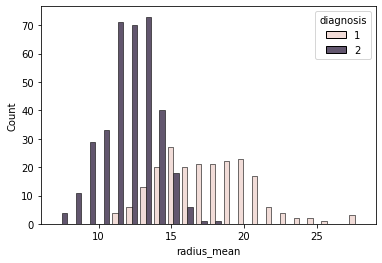

In [40]:
sns.histplot(data=data, x="radius_mean", hue="diagnosis", multiple="dodge", shrink=.8)


<AxesSubplot:xlabel='perimeter_se', ylabel='Count'>

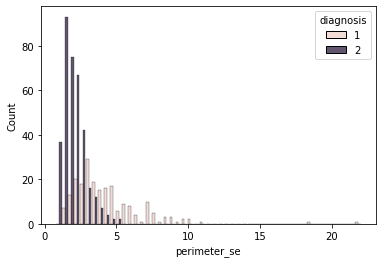

In [45]:
sns.histplot(data=data, x="perimeter_se", hue="diagnosis", multiple="dodge", shrink=.9)


<AxesSubplot:xlabel='symmetry_worst', ylabel='Count'>

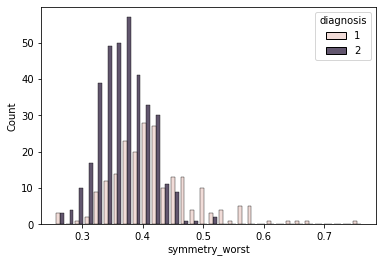

In [46]:
sns.histplot(data=data, x="symmetry_worst", hue="diagnosis", multiple="dodge", shrink=.8)


#### Вывод: графически получили выраженную зависимость целевой переменной от других

## 4. Построим heatmap для матрицы корреляций

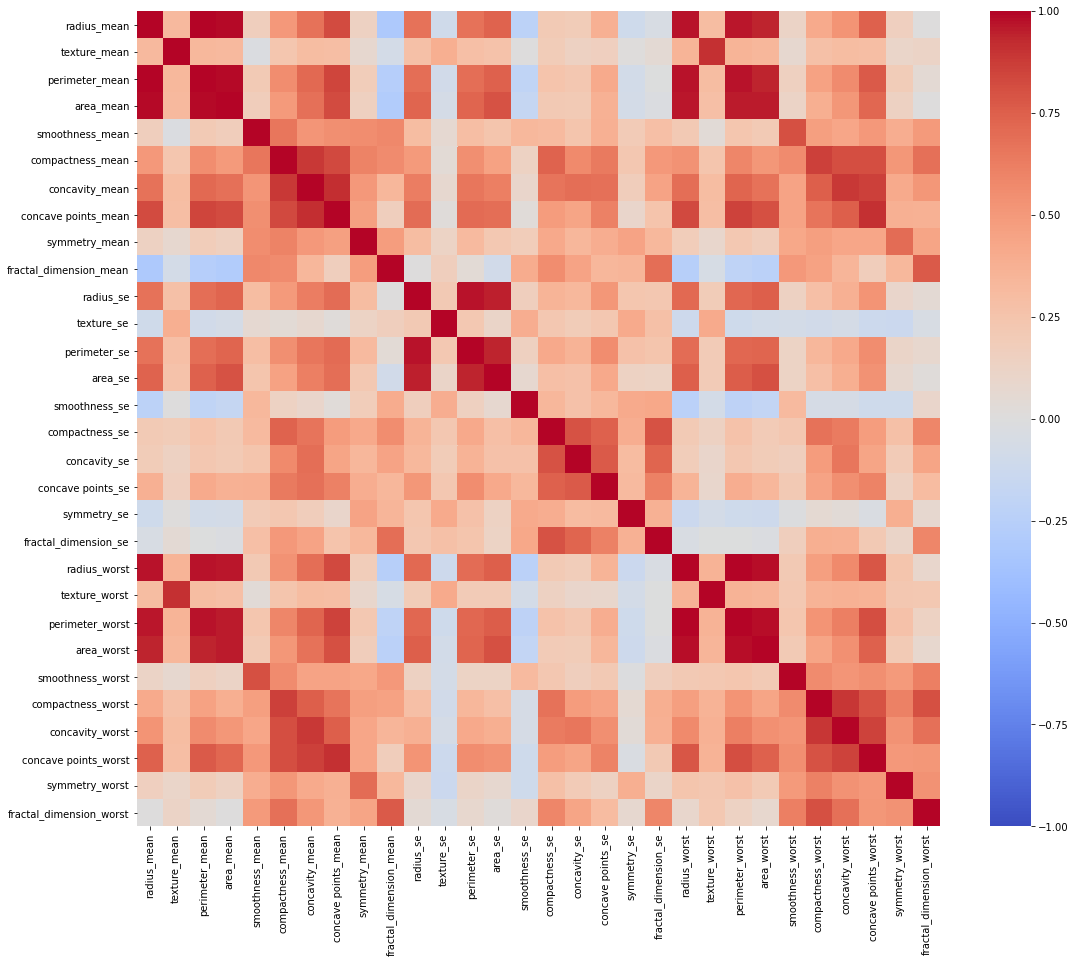

In [20]:
plt.subplots(figsize=(18,15))
sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10000), vmin=-1, center=0)
plt.show()

#### Получим 8 наиболее скоррелированных признаков 

In [49]:
k = 8
corrmat = data.corr()
cols = corrmat.nlargest(k, 'diagnosis')['diagnosis'].index.tolist()
cols

['diagnosis',
 'smoothness_se',
 'fractal_dimension_mean',
 'texture_se',
 'symmetry_se',
 'fractal_dimension_se',
 'concavity_se',
 'compactness_se']

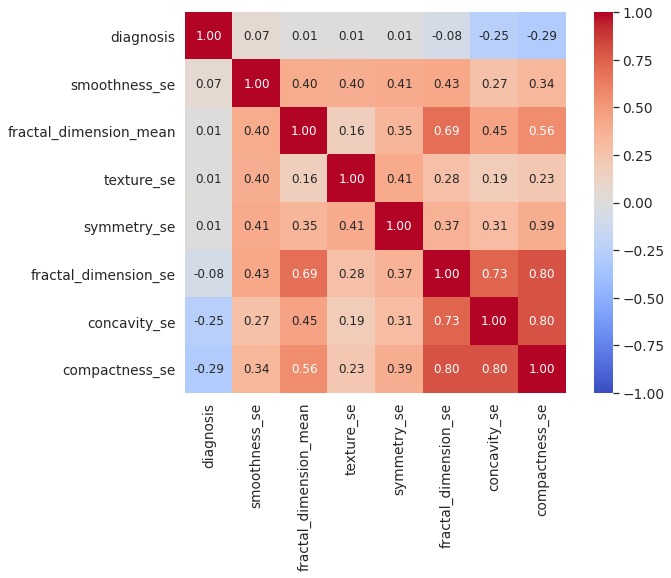

In [50]:
cm = np.corrcoef(data[cols].values.T)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},\
                yticklabels=cols, xticklabels=cols, vmin=-1, center=0,\
                    cmap=sns.color_palette('coolwarm',1000))
plt.show()

## 5. Построим для сильно скоррелированных признаков попарные scatterplot-ы

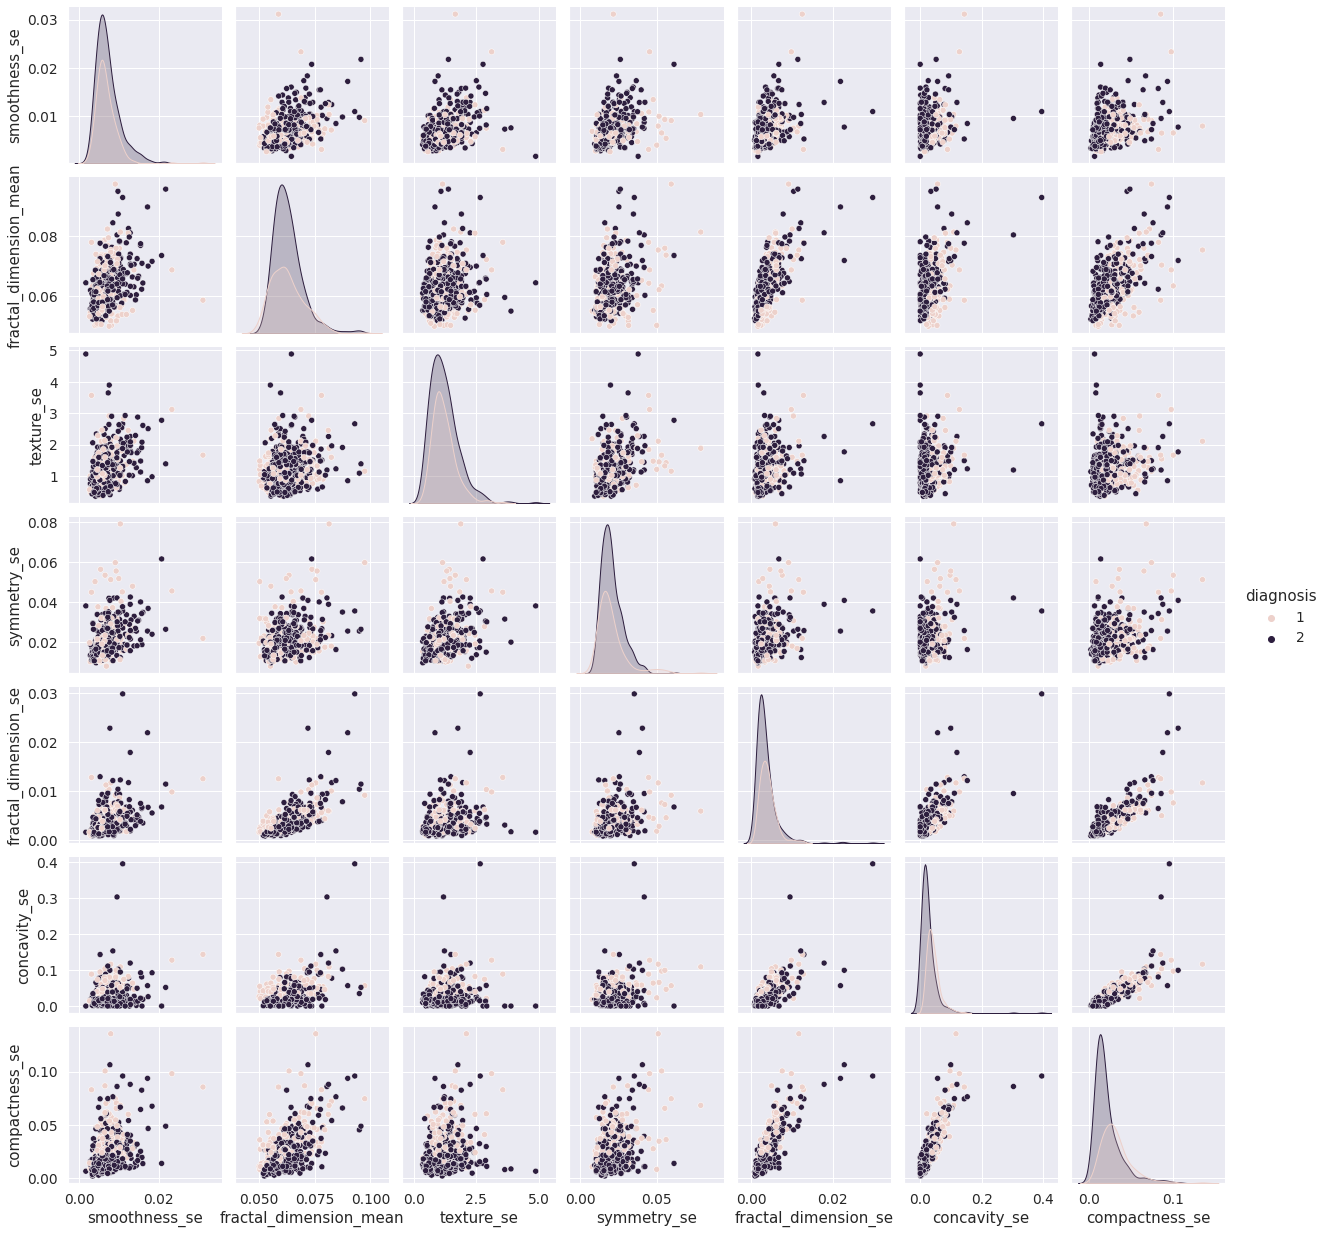

In [51]:
sns.pairplot(data=data[cols], hue='diagnosis')
plt.show()

In [25]:
#линейная зависимость не наблюдается 

## 6. boxplots и группировка по целевой переменной

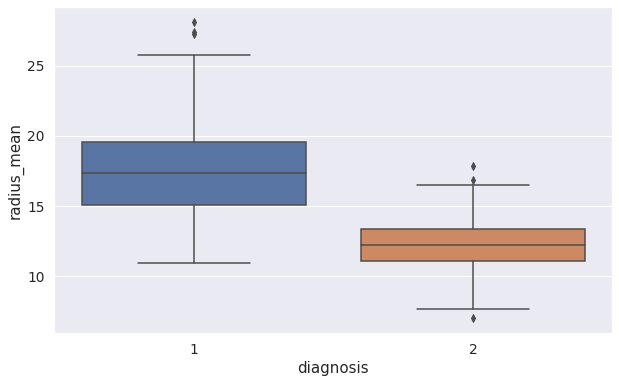

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='diagnosis', y="radius_mean")
plt.show()

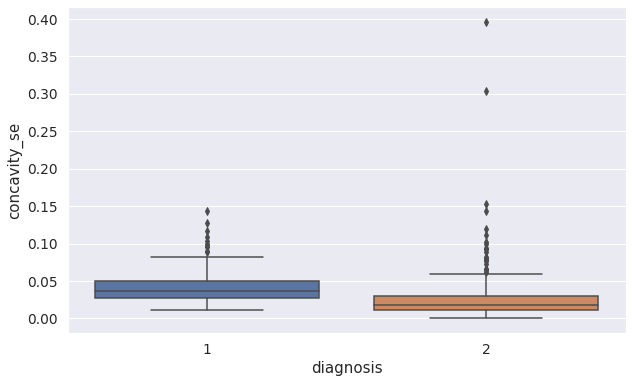

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='diagnosis', y="concavity_se")
plt.show()

In [ ]:
#Влияние переменной concavity_se на диагноз

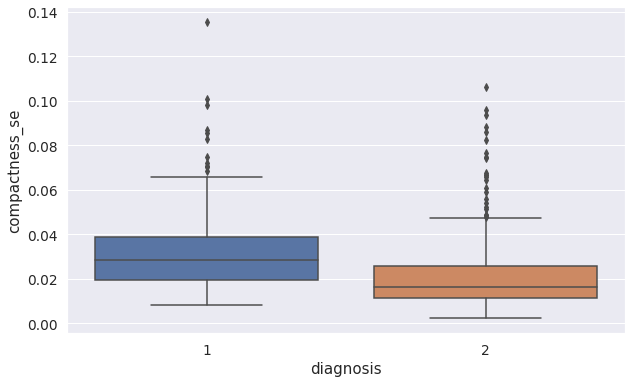

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='diagnosis', y="compactness_se")
plt.show()

In [ ]:
#Влияние переменной compactness_se на диагноз

#### Очень явно прослеживается различия диапазонов переменных при разных значениях целевой переменной

# Часть 2

In [56]:
data


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [57]:
## Train-test split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['diagnosis'], axis=1), data['diagnosis'], test_size=0.20, random_state=42, stratify=data['diagnosis']
)

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [60]:
y_train.value_counts(normalize=True)

2    0.626374
1    0.373626
Name: diagnosis, dtype: float64

In [61]:
y_test.value_counts(normalize=True)

2    0.631579
1    0.368421
Name: diagnosis, dtype: float64

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

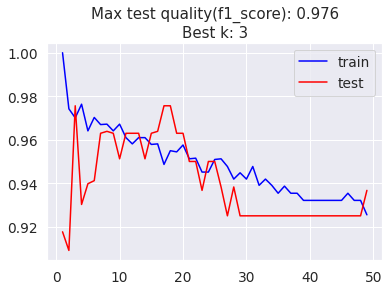

In [68]:
neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality(f1_score): {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();

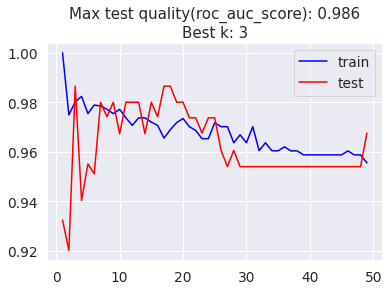

In [69]:
neighbors = range(1, 50)
roc_auc_score_train = []
roc_auc_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    roc_auc_score_train.append(roc_auc_score(knn.predict(X_train_scaled), y_train))
    roc_auc_score_test.append(roc_auc_score(knn.predict(X_test_scaled), y_test))
    
plt.plot(neighbors, roc_auc_score_train, color='blue', label='train')
plt.plot(neighbors, roc_auc_score_test, color='red', label='test')
plt.title("Max test quality(roc_auc_score): {:.3f}\nBest k: {}".format(max(roc_auc_score_test), np.argmax(roc_auc_score_test)+1))
plt.legend();

### Использовали две метрики, ROC_AUC показала более высокий скор

In [70]:

from sklearn.model_selection import GridSearchCV

param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
) 


test_predictions = grid_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best CV score: 0.961, best CV k: 4
Resulting test score: 0.940


### Получили наилучшие параметры для обучения

In [72]:
grid_search.best_estimator_.p

1

### Вывод: скор увеличился на 0.013